In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

In [ ]:
# User defined inputs
p_HH = 0.7
p_TT = 0.3
p_FF = 0.2
p = 0.7
q = 0.1
np.random.seed(28177182)

Notice that the p_TT which denotes the probability of Tail stays in tail is much lower than pHH, making the chain less tail prone compared to head. (Similar to the cryptocurrency market)

In [ ]:
class state(Enum):
    fair = 1
    head = 2
    tail = 3

def stateChange(p_HH, p_TT, p_FF, curr):
  u = np.random.uniform()
  if curr == state.fair:
    if u < p_FF:
      return curr
    elif p_FF < u < (1+p_FF)/2:
      return state.head
    else:
      return state.tail
  elif curr == state.head:
    if u < p_HH:
      return curr
    else:
      return state.fair
  else:
    if u < p_TT:
      return curr
    else:
      return state.fair

In [ ]:
def pathSim(p_HH, p_TT, p_FF, p, q, S, sigma, L, moveType='uni'):
  curr = state.fair
  res = np.zeros(L+1)
  res[0] = S
  for i in range(1, L+1):
    u = np.random.uniform()
    curr = stateChange(p_HH, p_TT, p_FF, curr)
    if curr == state.fair:
      if u < 0.5:
        if moveType == 'uni':
          res[i] = res[i-1] + sigma * np.random.uniform()
        else:
          res[i] = res[i-1] + sigma * np.abs(np.random.normal())
      else:
        if moveType == 'uni':
          res[i] = res[i-1] - sigma * np.random.uniform()
          if res[i] < 0: res[i] = 0 
        else:
          res[i] = res[i-1] - sigma * np.abs(np.random.normal())
          if res[i] < 0: res[i] = 0 
    elif curr == state.head:
      if u < p:
        if moveType == 'uni':
          res[i] = res[i-1] + sigma * np.random.uniform()
        else:
          res[i] = res[i-1] + sigma * np.abs(np.random.normal())
      else:
        if moveType == 'uni':
          res[i] = res[i-1] - sigma * np.random.uniform()
          if res[i] < 0: res[i] = 0 
        else:
          res[i] = res[i-1] - sigma * np.abs(np.random.normal())
          if res[i] < 0: res[i] = 0 
    else:
      if u < q:
        if moveType == 'uni':
          res[i] = res[i-1] + sigma * np.random.uniform()
        else:
          res[i] = res[i-1] + sigma * np.abs(np.random.normal())
      else:
        if moveType == 'uni':
          res[i] = res[i-1] - sigma * np.random.uniform()
          if res[i] < 0: res[i] = 0 
        else:
          res[i] = res[i-1] - sigma * np.abs(np.random.normal())
          if res[i] < 0: res[i] = 0 
      
  return res

In [ ]:
L = 5000
# path = pathSim(p_HH, p_TT, p_FF, p, q, 100, 10, L, moveType='uni')

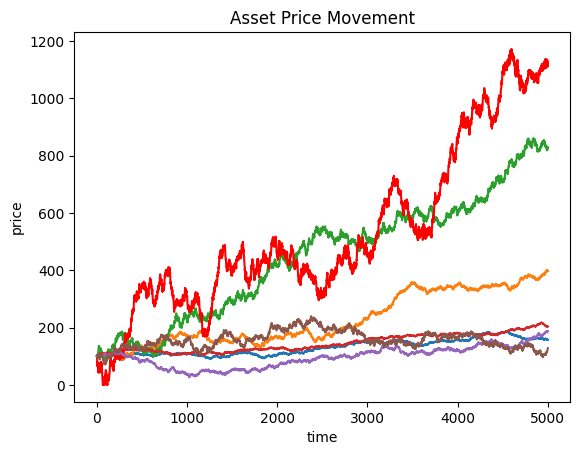

In [ ]:
x = np.arange(0, L+1)
plt.title("Asset Price Movement")
plt.xlabel("time")
plt.ylabel("price")
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 1, L, moveType='uni'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 2, L, moveType='uni'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 5, L, moveType='uni'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 10, L, moveType='uni'), color = 'r')
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 0.5, L, moveType='norm'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 1, L, moveType='norm'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 2, L, moveType='norm'))
plt.show()

#Stats Analysis Part:

In [ ]:
import pandas as pd
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
m = 10
L = 1000
S = 100
sigma = 0.5

Conduct a time series analysis on a single time series

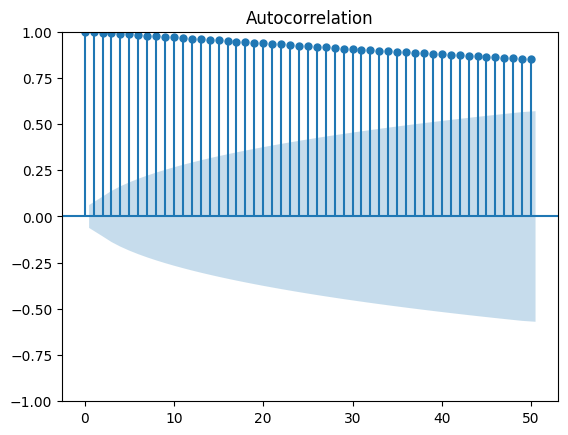

In [ ]:
test = pathSim(p_HH, p_TT, p_FF, p, q, S, sigma, L, moveType='norm')
plot_acf(test, lags=50)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


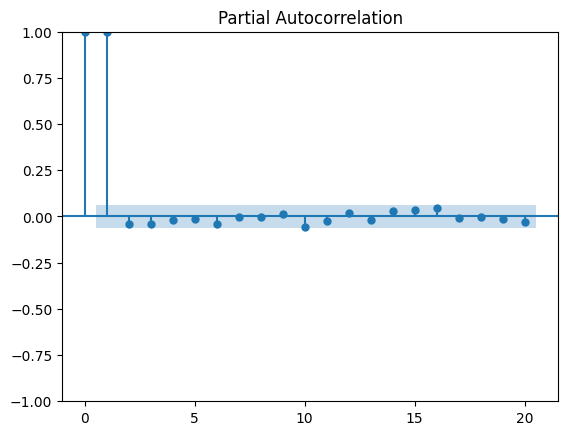

In [ ]:
plot_pacf(test, lags=20)
plt.show()

In [ ]:
sim_list = []
for i in range(1, 11):
    sim_list.append('Sim{}'.format(i))

In [ ]:
dfa = []
for i in range(m):
  dfa.append(pathSim(p_HH, p_TT, p_FF, p, q, S, sigma, L, moveType='norm'))
df = pd.DataFrame(dfa).transpose()
df.columns = sim_list
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
# print(corr_matrix)

,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6,Sim7,Sim8,Sim9,Sim10
Sim1,1.000000,0.540219,0.852996,-0.838109,-0.806391,-0.628877,0.103820,0.902398,0.924798,0.054136
Sim2,0.540219,1.000000,0.392002,-0.459263,-0.386969,-0.329329,-0.199796,0.621358,0.568166,0.293049
Sim3,0.852996,0.392002,1.000000,-0.821627,-0.820347,-0.591673,0.241286,0.869163,0.870831,-0.188045
Sim4,-0.838109,-0.459263,-0.821627,1.000000,0.759413,0.520004,-0.126865,-0.839715,-0.827239,-0.023861
Sim5,-0.806391,-0.386969,-0.820347,0.759413,1.000000,0.787697,0.056754,-0.855232,-0.861184,-0.056463
Sim6,-0.628877,-0.329329,-0.591673,0.520004,0.787697,1.000000,0.145041,-0.679440,-0.712744,-0.015721
Sim7,0.103820,-0.199796,0.241286,-0.126865,0.056754,0.145041,1.000000,-0.066516,0.071694,-0.399606
Sim8,0.902398,0.621358,0.869163,-0.839715,-0.855232,-0.679440,-0.066516,1.000000,0.949937,-0.038985
Sim9,0.924798,0.568166,0.870831,-0.827239,-0.861184,-0.712744,0.071694,0.949937,1.000000,0.041553
Sim10,0.054136,0.293049,-0.188045,-0.023861,-0.056463,-0.015721,-0.399606,-0.038985,0.041553,1.000000


In [ ]:
ac, kurt, skew = np.zeros(m), np.zeros(m), np.zeros(m)
for i in range(m):
  ac[i] = df.iloc[:,i].autocorr()
  kurt[i] = kurtosis(df.iloc[:,i])
  skew[i] = scipy.stats.skew(df.iloc[:,i])

Text(0.5, 1.0, 'Skewness')

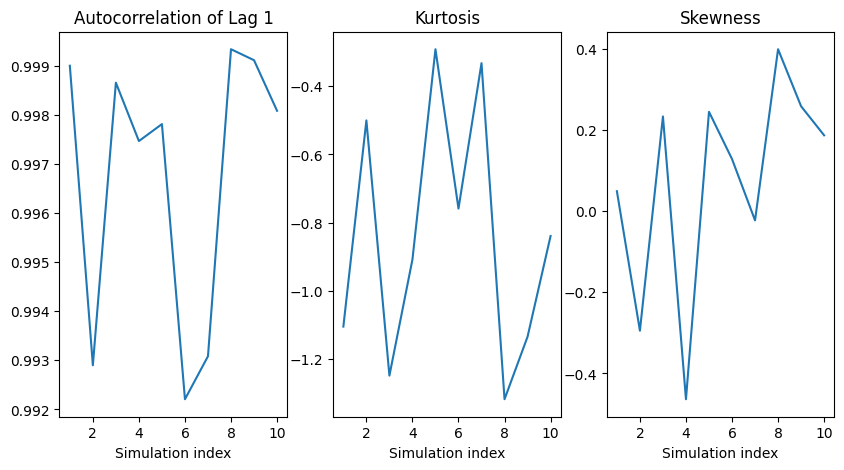

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (10,5))
x = np.linspace(1,10,10)
axs[0].plot(x, ac)
axs[0].set_xlabel('Simulation index')
axs[0].set_title('Autocorrelation of Lag 1')
axs[1].plot(x, kurt)
axs[1].set_xlabel('Simulation index')
axs[1].set_title('Kurtosis')
axs[2].plot(x, skew)
axs[2].set_xlabel('Simulation index')
axs[2].set_title('Skewness')
